# CS375 Assignment 2 Lab Report
#### Group 6 

## Part 1: Task Generalization

In [7]:
%matplotlib inline 
import os
import numpy as np
import tensorflow as tf
import pymongo as pm
import gridfs
import cPickle
import scipy.signal as signal
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, trange
from assignment_utils import *

In [21]:

import pandas as pd


In [33]:
model_df = pd.read_csv('models.csv',delimiter = ' ')


In [34]:
model_df

,model_name,data_name,loss_name,exp_id,test_id
0,shallow_bottle,cifar10,autoencoder_loss,end,end
1,shallow_bottle,cifar10,ae_conv1_loss,end,end
2,pooled_shallow,cifar10,autoencoder_loss,end,end
3,pooled_shallow,cifar10,ae_conv1_loss,end,end
4,bottle_model,cifar10,autoencoder_loss,end,end
5,bottle_model,cifar10,ae_conv3_loss,end,end


### Getting data from the database

In [8]:
from model_switcher import *

In [9]:
my_model_shallow = model_switcher(model_name = 'shallow_bottle',
                          data_name = 'cifar10',
                          loss_name = 'autoencoder_loss')

In [10]:
vars(my_model_shallow)

{'collname': 'shallow_bottle_autoencoder_loss',
 'data_name': 'cifar10',
 'dbname': 'cifar10',
 'exp_fn': <class experiments.cifar10 at 0x7f752787fa78>,
 'exp_id': '',
 'layers': ['conv1', 'deconv1'],
 'loss_fn': <function losses.autoencoder_loss>,
 'loss_name': 'autoencoder_loss',
 'model_fn': <function models.shallow_bottle>,
 'model_name': 'shallow_bottle',
 'test_id': ''}

In [11]:
coll, db = p_get_coll(vars(my_model_shallow)['collname'], vars(my_model_shallow)['dbname'])
print(coll)
print coll.distinct('exp_id')

Collection(Database(MongoClient(host=['localhost:24444'], document_class=dict, tz_aware=False, connect=True), u'cifar10'), u'shallow_bottle_autoencoder_loss.files')
[u'finalrun', u'end', u'end_help', u'end_test', u'end_hm']


### Plotting the training curve
To see the training curve for the experiment, we pull the training loss and plot it, along with a smoothed version of the training loss obtained by convolving the loss with a boxcar.

end


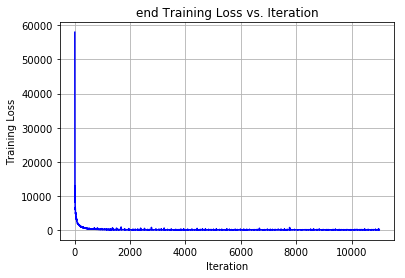

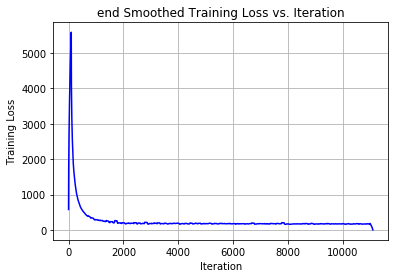

In [12]:
train_id = 'end'
test_id = train_id + '_hm'

print(train_id)
p22_training(train_id,coll)

### Plotting the validation results

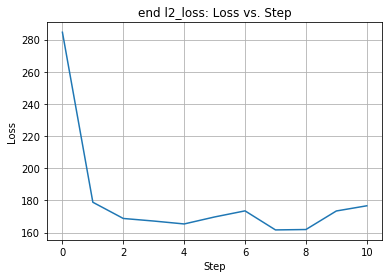

In [13]:
l2_loss, img_inputs, img_prediction = get_validation_data(train_id, coll, 20)
plot_l2_loss(l2_loss, train_id)

np_inputs = np.array(img_inputs).transpose([0,2,3,4,1])
np_prediction = np.array(img_prediction).transpose([0,2,3,4,1])
my_shape = np_inputs.shape

In [14]:
def show_row(in_row, num_show = None):
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    
    if num_show is None:
        num_show = len(in_row)
    fig = figure(figsize = [20, 6])
    for i in range(num_show):
        a = fig.add_subplot(1,num_show, i+1)
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
        imshow(in_row[:,:,:,i])

##### Targets

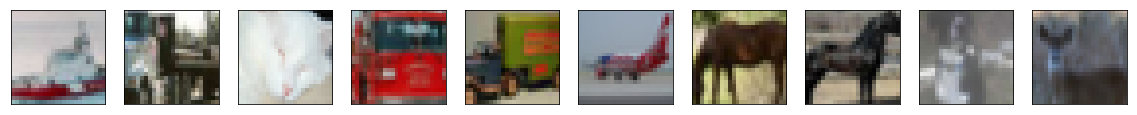

In [15]:
show_row(np_inputs[-1,:].squeeze(), 10)

##### Final step

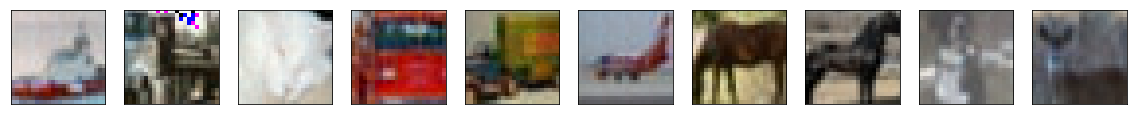

In [16]:
show_row(np_prediction[-1,:].squeeze(), 10)

## Part 2: Representational Similararity Analysis (RSA)


In [17]:
data, uni_steps, uni_var = get_neural_exp_data(coll, test_id)

In [18]:
for ivar in uni_var:
    for istep in uni_steps:
        print(data[(ivar, istep)].keys())

[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']
[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']
[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']
[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']
[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']
[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']
[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']
[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']
[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']
[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']
[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']


KeyError: (u'V6', 4000)

### Analyzing the RDM results

We will start with visualizing the RDMs we computed for each layer and the IT neurons. 

[u'rdm_conv1', u'rdm_it', u'rdm_deconv1']


UnboundLocalError: local variable 'spearman_corrcoef' referenced before assignment

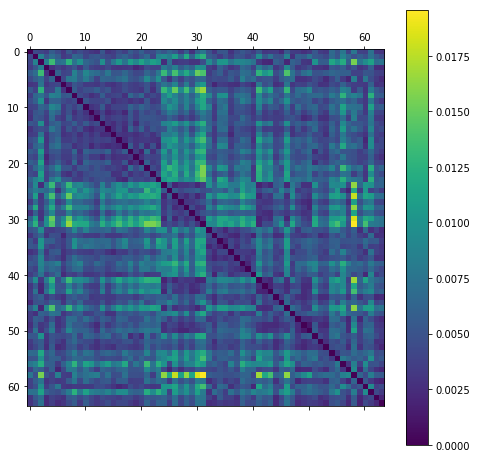

In [19]:
for ivar in uni_var:
    for istep in uni_steps:
        print(data[(ivar, istep)].keys())
        plot_rdms(data[(ivar, istep)], vars(my_model_shallow)['layers'], istep)

### Analyzing the categorization results

Now let's visualize the results of the categorization and within categorization test we performed for each layer. Describe what you see.    

In [ ]:
for ivar in uni_var:
    for istep in uni_steps:
        print(data[(ivar, istep)].keys())
        plot_categorization_results(data[(ivar, istep)], vars(my_model_shallow)['layers'], istep)

In [ ]:
for ivar in uni_var:
    for istep in uni_steps:
        print(data[(ivar, istep)].keys())
        categories = ['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables']
        for category in categories:
            plot_categorization_results(data[(ivar, istep)], vars(my_model_shallow)['layers'], istep, category=category)

### Continuous estimation results
We regress our activations against the 'ty' continuous variable. 

In [ ]:
for ivar in uni_var:
    for istep in uni_steps:
        print(data[(ivar, istep)].keys())
        print("Continuous Estimation Task for ty \n")
        for layer in vars(my_model_shallow)['layers']:
            print('layer:' + layer)
            print(data[(ivar, istep)]['continuous_' + layer])
            print("")

## Part 3: Neural Response Regression

We will now display the results of the regression test. 


In [ ]:
# TODO Fix this, get response from Damian
#plot_regression_results(data, target_layers, step)

#step = validation_data[-1]['step']

def plot_regression_results(data, target_layers, step):
    """
    Prints out the noise corrected multi rsquared loss for each layer.
    
    You will need to EDIT this function.
    """
    for layer in target_layers:
            k = 'it_regression_' + layer
            print(data.keys())
            print(data['it_regression_conv1'])
            print('step', step, 'layer', layer, 1 - data[k]['noise_corrected_multi_rsquared_loss'])

for ivar in uni_var:
    for istep in uni_steps:
        print(data[(ivar, istep)].keys())
        plot_regression_results(data[(ivar, istep)], vars(my_model_shallow)['layers'], istep)

## Part 4: Filter Visualization Evaluations

Lastly, we will plot the conv1 filter kernels. 

In [ ]:

for ivar in uni_var:
    for istep in uni_steps:
        print(data[(ivar, istep)].keys())
        plot_conv1_kernels(data[(ivar, istep)])

## Part 5: Evaluation of the unsupervised models on ImageNet

In [ ]:
linear_classification(data)